## PyTorch Variables

In [2]:
import torch
from torch.autograd import Variable

In [3]:
# define variable
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)



    Assume we have equation y = x^2
    Define x = [2,4] variable
    After calculation we find that y = [4,16] (y = x^2)
    Recap o equation is that o = (1/2)sum(y) = (1/2)sum(x^2)
    deriavative of o = x
    Result is equal to x so gradients are [2,4]
    Lets implement



In [4]:
# lets make basic backward propagation
# we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)

# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =  ",o)

# backward
o.backward() # calculates gradients

# As I defined, variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward>)
gradients:  tensor([2., 4.])


### Linear Regression

    Detailed linear regression tutorial is in my machine learning tutorial in part "Regression". I will not explain it in here detailed.
    Linear Regression tutorial: https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
    y = Ax + B.
        A = slope of curve
        B = bias (point that intersect y-axis)
    For example, we have car company. If the car price is low, we sell more car. If the car price is high, we sell less car. This is the fact that we know and we have data set about this fact.
    The question is that what will be number of car sell if the car price is 100.


In [6]:
import numpy as np
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

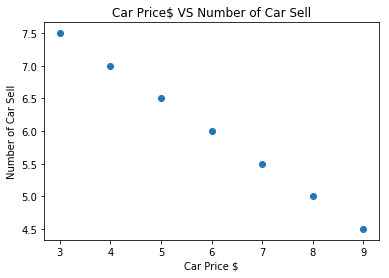

In [8]:
# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

   * Now this plot is our collected data
   * We have a question that is what will be number of car sell if the car price is 100$
   * In order to solve this question we need to use linear regression.
   * We need to line fit into this data. Aim is fitting line with minimum error.
   * Steps of Linear Regression
        - create LinearRegression class
        - define model from this LinearRegression class
        - MSE: Mean squared error
        - Optimization (SGD:stochastic gradient descent)
        - Backpropagation
        - Prediction
   * Lets implement it with Pytorch



epoch 0, loss 9.497756958007812
epoch 50, loss 6.397879600524902
epoch 100, loss 4.323315143585205
epoch 150, loss 2.9214444160461426
epoch 200, loss 1.974142074584961
epoch 250, loss 1.3340115547180176
epoch 300, loss 0.9014477729797363
epoch 350, loss 0.6091451644897461
epoch 400, loss 0.41162484884262085
epoch 450, loss 0.27815207839012146
epoch 500, loss 0.18795903027057648
epoch 550, loss 0.12701189517974854
epoch 600, loss 0.08582725375890732
epoch 650, loss 0.05799693614244461
epoch 700, loss 0.03919119015336037
epoch 750, loss 0.02648312970995903
epoch 800, loss 0.017895642668008804
epoch 850, loss 0.01209272537380457
epoch 900, loss 0.008171671070158482
epoch 950, loss 0.005522027611732483
epoch 1000, loss 0.0037314582150429487


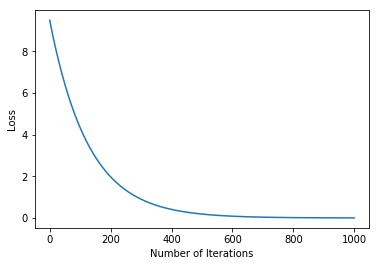

In [9]:
# Linear Regression with Pytorch

# libraries
import torch      
from torch.autograd import Variable     
import torch.nn as nn 
import warnings
warnings.filterwarnings("ignore")

# create class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)
    
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1

# MSE
mse = nn.MSELoss()

# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

    * Number of iteration is 1001.
    * Loss is almost zero that you can see from plot or loss in epoch number 1000.
    * Now we have a trained model.
    * While usign trained model, lets predict car prices.



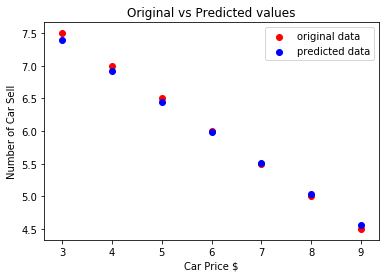

In [10]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()